In [1]:
import pandas as pd
text_ana = pd.read_csv('/Users/yangmi/Documents/text_analysis_twitter.csv')
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
text_ana

,id,screen_name,time,link,text,source
0,881004944714866688,KamalaHarris,2017-07-01T00:22:01-04:00,https://www.twitter.com/KamalaHarris/statuses/...,Republicans are trying to steal health care fr...,Sprout Social
1,881002538341986304,MarcVeasey,2017-07-01T00:12:28-04:00,https://www.twitter.com/kylegriffin1/statuses/...,RT @kylegriffin1 Rep. Mark Veasay has introduc...,Twitter for Android
2,881001393284419584,RepPaulTonko,2017-07-01T00:07:55-04:00,https://www.twitter.com/RepPaulTonko/statuses/...,A top U.S. science office went dark tonight. N...,Twitter for iPhone
3,881000301007958016,clairecmc,2017-07-01T00:03:34-04:00,https://www.twitter.com/clairecmc/statuses/881...,So the fundraising quarter ends in an hour in ...,Twitter for iPad
4,881015727540637696,tedcruz,2017-07-01T01:04:52-04:00,https://www.twitter.com/larry_kudlow/statuses/...,RT @larry_kudlow Important story @SenTedCruz @...,Twitter for iPhone
...,...,...,...,...,...,...
299995,939743413909549056,RepTedLieu,2017-12-10T01:27:44-05:00,https://www.twitter.com/ReadyLA/statuses/93956...,RT @ReadyLA REPORT FIRE DAMAGE from #CreekFire...,Twitter for iPhone
299996,939743003203301376,RepTedLieu,2017-12-10T01:26:06-05:00,https://www.twitter.com/LAFDtalk/statuses/9397...,RT @LAFDtalk Once a wildfire has burned throug...,Twitter for iPhone
299997,939741567706730497,JuliaBrownley26,2017-12-10T01:20:23-05:00,https://www.twitter.com/SCE/statuses/939739240...,"RT @SCE Update: As of 8:30pm, Saturday, about ...",Twitter Web Client
299998,939739240501596160,SteveKnight25,2017-12-10T01:11:09-05:00,https://www.twitter.com/santaclarita/statuses/...,RT @santaclarita #RyeFire Evening Update (12/9...,Twitter for iPhone


In [2]:
import re
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

def preprocess_text(text):    
    # 转换为小写
    text = text.lower()   
    # 移除URL
    text = re.sub(r'http\S+', '', text)
    # 移除特殊符号
    text = re.sub('[^A-Z^a-z^0-9^ ]', '', text)
    # 删除停用词
    text = [word for word in text.split() if word.lower() not in stopwords_list]
    return text

In [3]:
text_ana['text'][:1000] = text_ana['text'][:1000].apply(preprocess_text)

/var/folders/87/6c4tjldn0b9bqgff58m4gx540000gn/T/ipykernel_52353/2249322025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_ana['text'][:1000] = text_ana['text'][:1000].apply(preprocess_text)


In [4]:
text = text_ana['text'][:1000].map(' '.join)

In [5]:
text

0      republicans trying steal health care 22 millio...
1      rt kylegriffin1 rep mark veasay introduced bil...
2      top us science office went dark tonight good s...
3      fundraising quarter ends hour mo would really ...
4          rt larrykudlow important story sentedcruz nro
                             ...                        
995    even tho ripped judges mannypacquiao fight w c...
996    wrote nytmags annotated constitution print us ...
997    acosta saddest day montana voters elected guy ...
998    rt acosta cnn response sad day president unite...
999    looking get fireworks fix fourth heres great o...
Name: text, Length: 1000, dtype: object

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

#初始化CountVectorizer
vectorizer = CountVectorizer()

#将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

print('词袋特征矩阵的形状', X.shape)
print('特征词列表', vectorizer.get_feature_names_out())

词袋特征矩阵的形状 (1000, 4741)
特征词列表 ['04' '10' '100' ... 'zika' 'zoe' 'zoo']


In [7]:
list(X.toarray())
#.toarray()方法将稀疏矩阵转换为密集矩阵，list()将将数组转换为列表形式。

[array([1, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0,

In [8]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [9]:
# 观察词袋模型的词频计数结果
sorted (word_freq.items(), key=lambda x: x[1], reverse=True)

[('rt', 286),
 ('amp', 171),
 ('qt', 154),
 ('realdonaldtrump', 88),
 ('great', 66),
 ('health', 58),
 ('care', 57),
 ('today', 53),
 ('us', 48),
 ('people', 46),
 ('trump', 46),
 ('bill', 45),
 ('trumpcare', 44),
 ('would', 40),
 ('must', 39),
 ('happy', 38),
 ('day', 36),
 ('new', 36),
 ('voter', 36),
 ('get', 34),
 ('gop', 33),
 ('president', 32),
 ('potus', 31),
 ('see', 30),
 ('act', 28),
 ('congress', 28),
 ('july', 28),
 ('need', 28),
 ('one', 28),
 ('rights', 27),
 ('americans', 26),
 ('healthcare', 26),
 ('medicaid', 26),
 ('years', 25),
 ('fight', 24),
 ('work', 24),
 ('america', 23),
 ('bensasse', 23),
 ('fraudnewscnn', 23),
 ('office', 23),
 ('states', 23),
 ('thanks', 23),
 ('weekend', 23),
 ('fnn', 22),
 ('take', 22),
 ('trumps', 22),
 ('4th', 21),
 ('good', 21),
 ('join', 21),
 ('make', 21),
 ('media', 21),
 ('senate', 21),
 ('state', 21),
 ('vote', 21),
 ('bad', 20),
 ('commission', 20),
 ('country', 20),
 ('house', 20),
 ('thank', 20),
 ('violence', 20),
 ('want', 20),

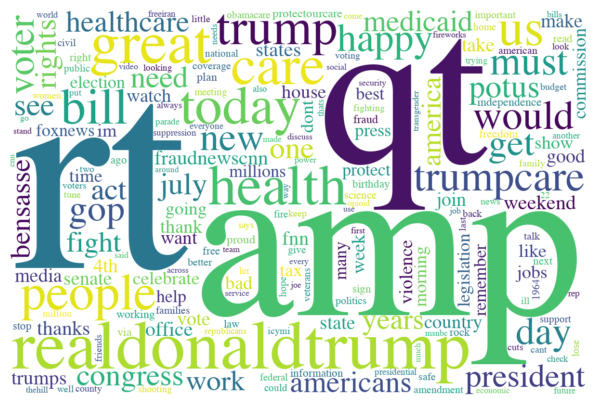

<Figure size 640x480 with 0 Axes>

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# 根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    font_path='Times.ttc'
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_twi.png', dpi=100)